# SSENSE Fashion

# Load Data


In [15]:
import pandas as pd

# Load the dataset
file_path = '/Users/ymadigital/Downloads/SSENSE Fashion Dataset/ssense_dataset.csv'
ssense_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure and content
ssense_data.head()


,brand,description,price_usd,type
0,Rick Owens,Black Moncler Edition Down Coat,2585,mens
1,Rick Owens,Black Moncler Edition Cyclopic Down Coat,2405,mens
2,Rick Owens,Black Moncler Edition Cyclopic Down Jacket,3160,mens
3,Rick Owens,Taupe & Green Moncler Edition Down Coat,3505,mens
4,Rick Owens,Taupe & Green Moncler Edition Cyclopic Down Ja...,2885,mens


# Basic statistics and insights from the data


In [16]:
# Basic Descriptive Statistics for Price
price_stats = ssense_data['price_usd'].describe()

# Count of Products by Gender
gender_distribution = ssense_data['type'].value_counts()

# Most Common Brands
top_brands = ssense_data['brand'].value_counts().head(10)

price_stats


count    19919.000000
mean       559.414981
std        682.364076
min         20.000000
25%        185.000000
50%        350.000000
75%        648.500000
max      13000.000000
Name: price_usd, dtype: float64

In [17]:
gender_distribution

mens      11771
womens     8148
Name: type, dtype: int64

In [18]:
top_brands

Gucci             481
Nike              299
Bottega Veneta    296
Rick Owens        258
Marni             250
A.P.C.            249
AMI Paris         244
Isabel Marant     240
rag & bone        215
Marc Jacobs       196
Name: brand, dtype: int64

## Price ranges for different brands, comparisons between men's and women's fashion, trends in product descriptions.

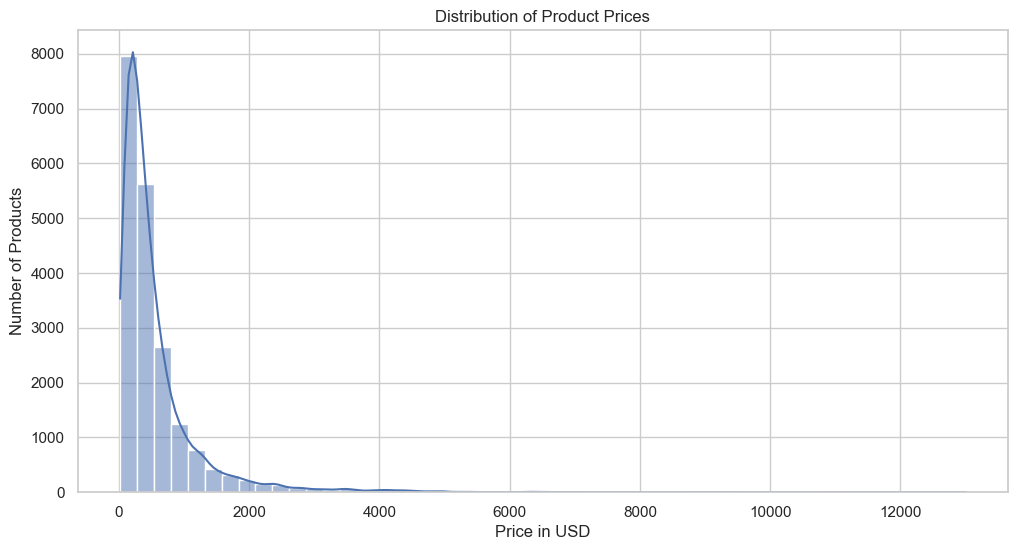

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visual style
sns.set(style="whitegrid")

# Plotting the distribution of prices
plt.figure(figsize=(12, 6))
sns.histplot(ssense_data['price_usd'], bins=50, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price in USD')
plt.ylabel('Number of Products')
plt.show()


This histogram shows the distribution of prices across the dataset. There's a high concentration of products in the lower price range, with a few items extending into the higher price ranges. The distribution appears right-skewed, indicating that while most products are moderately priced, there are some significantly more expensive items.

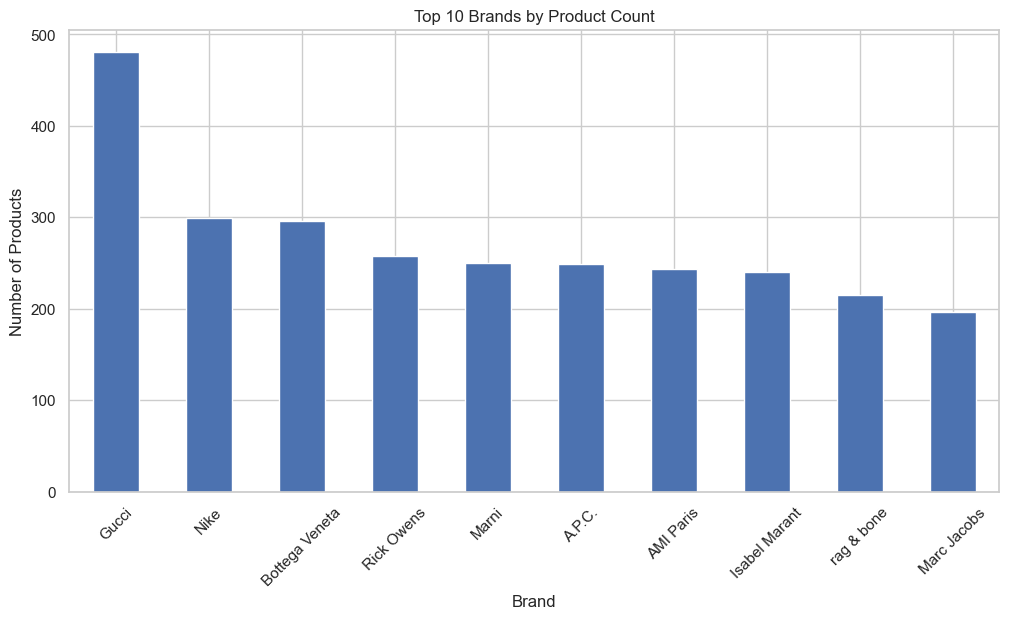

In [20]:
# Plotting the top brands
plt.figure(figsize=(12, 6))
top_brands.plot(kind='bar')
plt.title('Top 10 Brands by Product Count')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()


This bar chart represents the top 10 brands by the number of products listed. Gucci leads with the highest number of products, followed by Nike and Bottega Veneta. This chart gives an insight into which brands are most prevalent in the dataset and, possibly, their popularity or focus in SSENSE's inventory.

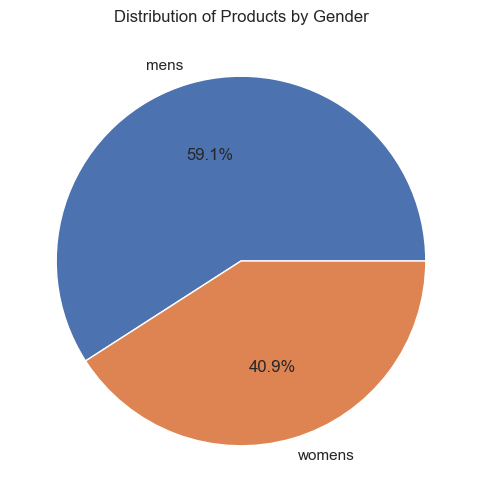

In [21]:
# Plotting the gender distribution
plt.figure(figsize=(6, 6))
gender_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Products by Gender')
plt.ylabel('')
plt.show()

The pie chart illustrates the gender distribution of the products. Approximately 59% of the products are targeted towards men, and about 41% are for women. This highlights a greater emphasis on men's fashion in this specific collection of data.

## Further analysis

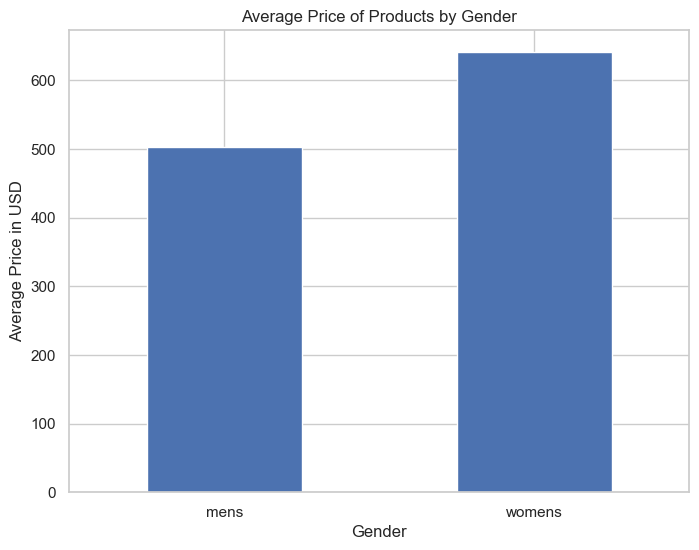

In [27]:
# Further analysis: Comparison of average prices between men's and women's products
# Grouping data by gender and calculating the average price for each
average_price_by_gender = ssense_data.groupby('type')['price_usd'].mean()

# Plotting the average prices by gender
plt.figure(figsize=(8, 6))
average_price_by_gender.plot(kind='bar')
plt.title('Average Price of Products by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Price in USD')
plt.xticks(rotation=0)
plt.show()

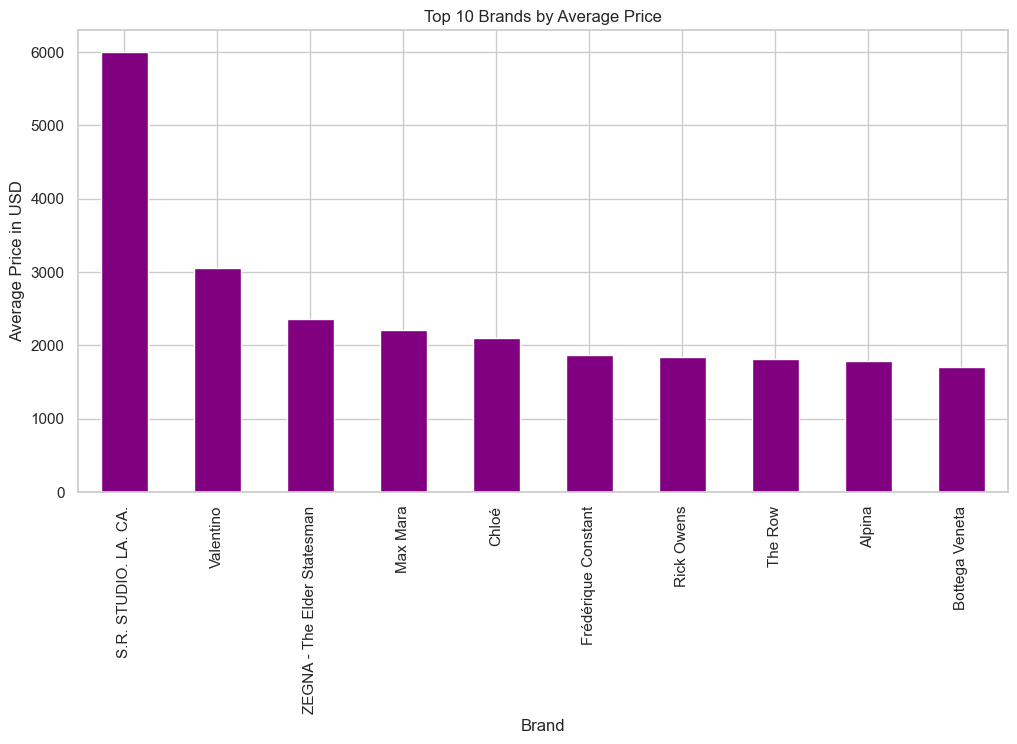

brand
S.R. STUDIO. LA. CA.           6000.000000
Valentino                      3050.000000
ZEGNA - The Elder Statesman    2356.818182
Max Mara                       2217.500000
Chloé                          2100.500000
Frédérique Constant            1865.000000
Rick Owens                     1843.391473
The Row                        1814.086022
Alpina                         1791.666667
Bottega Veneta                 1712.027027
Name: price_usd, dtype: float64

In [30]:
# Selecting the top 10 brands by average price
top_10_average_price_brands = average_price_by_brand.head(10)

# Plotting the corrected average prices by brand
plt.figure(figsize=(12, 6))
top_10_average_price_brands.plot(kind='bar', color='purple')
plt.title('Top 10 Brands by Average Price')
plt.xlabel('Brand')
plt.ylabel('Average Price in USD')
plt.xticks(rotation=90)
plt.show()

# Ensuring that all bars are properly labeled
top_10_average_price_brands

## Analyzing the variety of product types

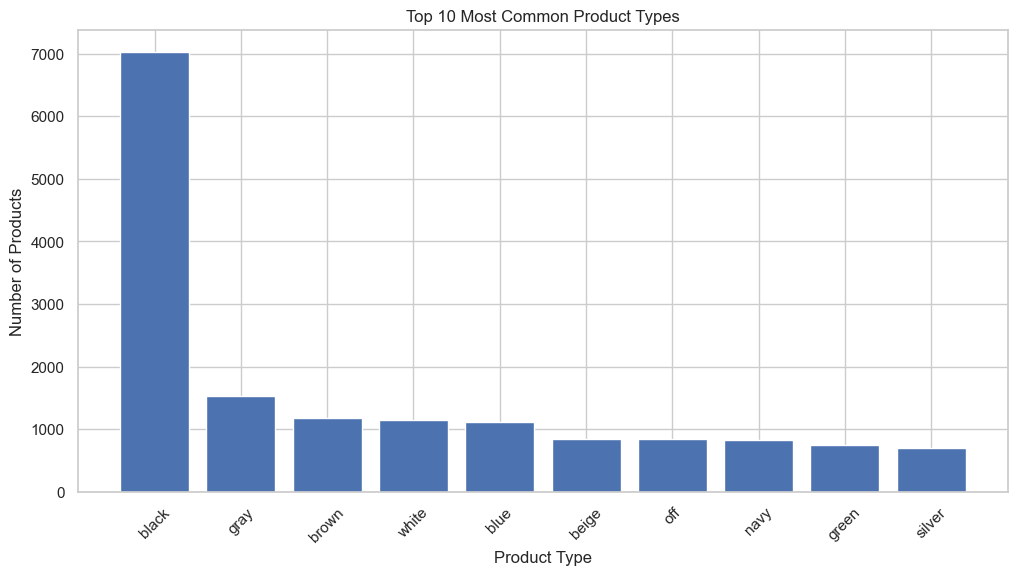

In [31]:
from collections import Counter
import re

# Function to extract product types from descriptions
def extract_product_type(description):
    # Simplistic approach: take the first word as the product type
    return re.split('\W+', description)[0].lower()

# Apply the function to the dataset
ssense_data['product_type'] = ssense_data['description'].apply(extract_product_type)

# Counting the occurrences of each product type
product_type_counts = Counter(ssense_data['product_type'])

# Getting the most common product types
most_common_product_types = product_type_counts.most_common(10)

# Plotting the most common product types
plt.figure(figsize=(12, 6))
plt.bar(*zip(*most_common_product_types))
plt.title('Top 10 Most Common Product Types')
plt.xlabel('Product Type')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()


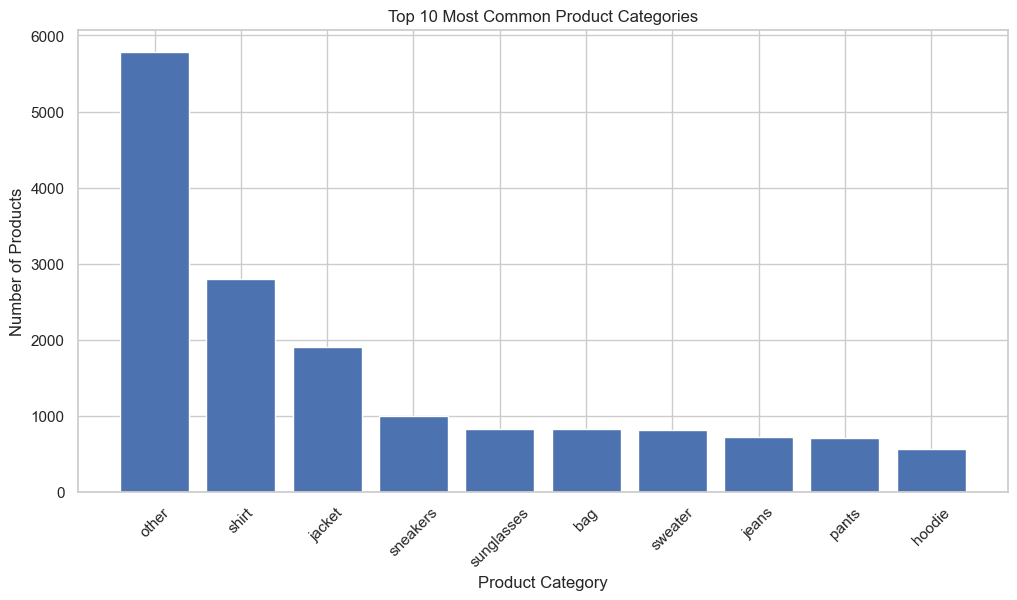

[('other', 5785),
 ('shirt', 2804),
 ('jacket', 1908),
 ('sneakers', 994),
 ('sunglasses', 830),
 ('bag', 822),
 ('sweater', 813),
 ('jeans', 724),
 ('pants', 709),
 ('hoodie', 565)]

In [33]:
# Common product categories in fashion
common_categories = [
    'coat', 'jacket', 'shirt', 'pants', 'shoes', 'bag', 'accessory', 'dress',
    'sweater', 'sneakers', 'boots', 'jeans', 'shorts', 'skirt', 'top', 'hat',
    'scarf', 'gloves', 'socks', 'underwear', 'blazer', 'suit', 'hoodie', 't-shirt',
    'sunglasses', 'belt', 'wallet', 'watch'
]

# Function to find product category in description
def find_product_category(description):
    for category in common_categories:
        if category in description.lower():
            return category
    return 'other'

# Apply the function to find categories
ssense_data['product_category'] = ssense_data['description'].apply(find_product_category)

# Counting the occurrences of each product category
product_category_counts = Counter(ssense_data['product_category'])

# Getting the most common product categories
most_common_product_categories = product_category_counts.most_common(10)

# Plotting the most common product categories
plt.figure(figsize=(12, 6))
plt.bar(*zip(*most_common_product_categories))
plt.title('Top 10 Most Common Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

most_common_product_categories


This distribution shows a diverse range of products, with shirts, jackets, and sneakers being among the most common. The category "Other" indicates a significant portion of products that don't fit into the predefined categories, suggesting a wide variety of items in the dataset.

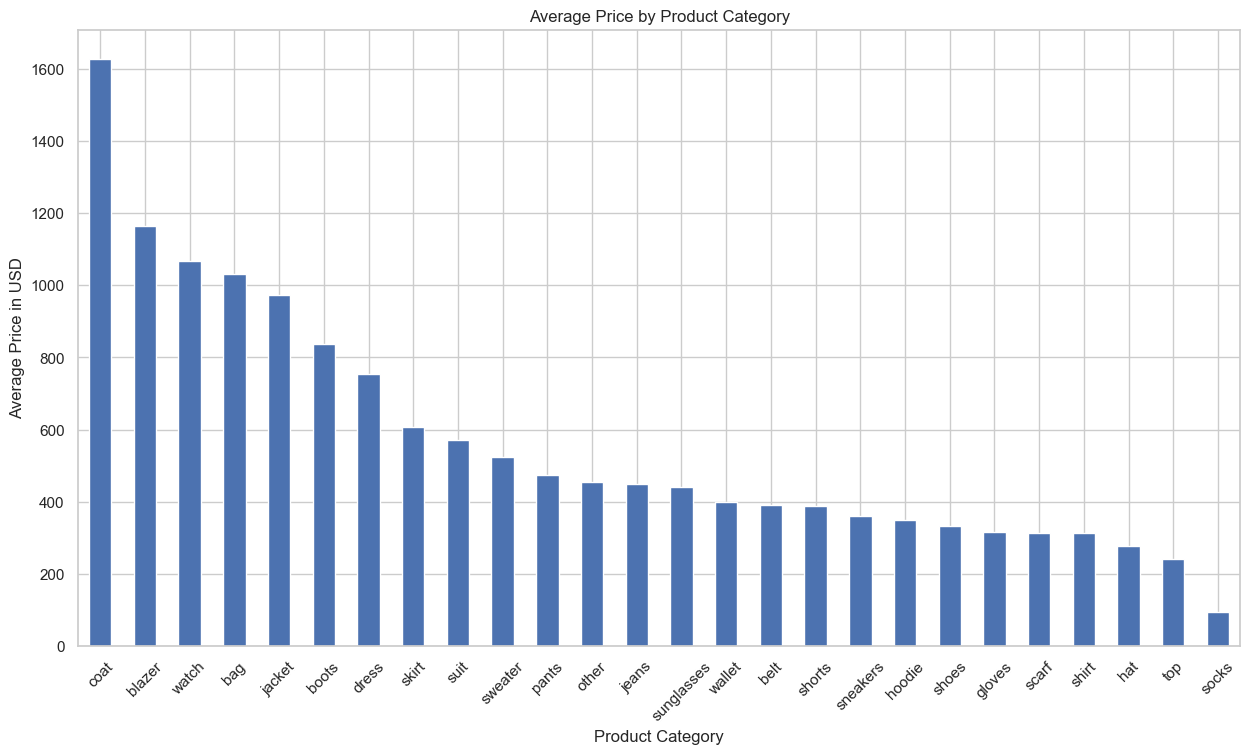

product_category
coat       1627.480545
blazer     1163.822785
watch      1068.694915
bag        1032.851582
jacket      972.066562
boots       837.904236
dress       753.110909
skirt       607.202299
suit        570.157895
sweater     524.912669
Name: price_usd, dtype: float64

In [34]:
# Further analysis: Exploring the relationship between price and product category
# Grouping data by product category and calculating the average price for each
average_price_by_category = ssense_data.groupby('product_category')['price_usd'].mean().sort_values(ascending=False)

# Plotting the average prices by product category
plt.figure(figsize=(15, 8))
average_price_by_category.plot(kind='bar')
plt.title('Average Price by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Price in USD')
plt.xticks(rotation=45)
plt.show()

# Displaying the top 10 product categories by average price
average_price_by_category.head(10)


These results indicate that coats, blazers, and watches are the categories with the highest average prices, suggesting they might be positioned as more premium or luxury items within the SSENSE collection. On the other hand, categories like sweaters, although popular, have a lower average price.

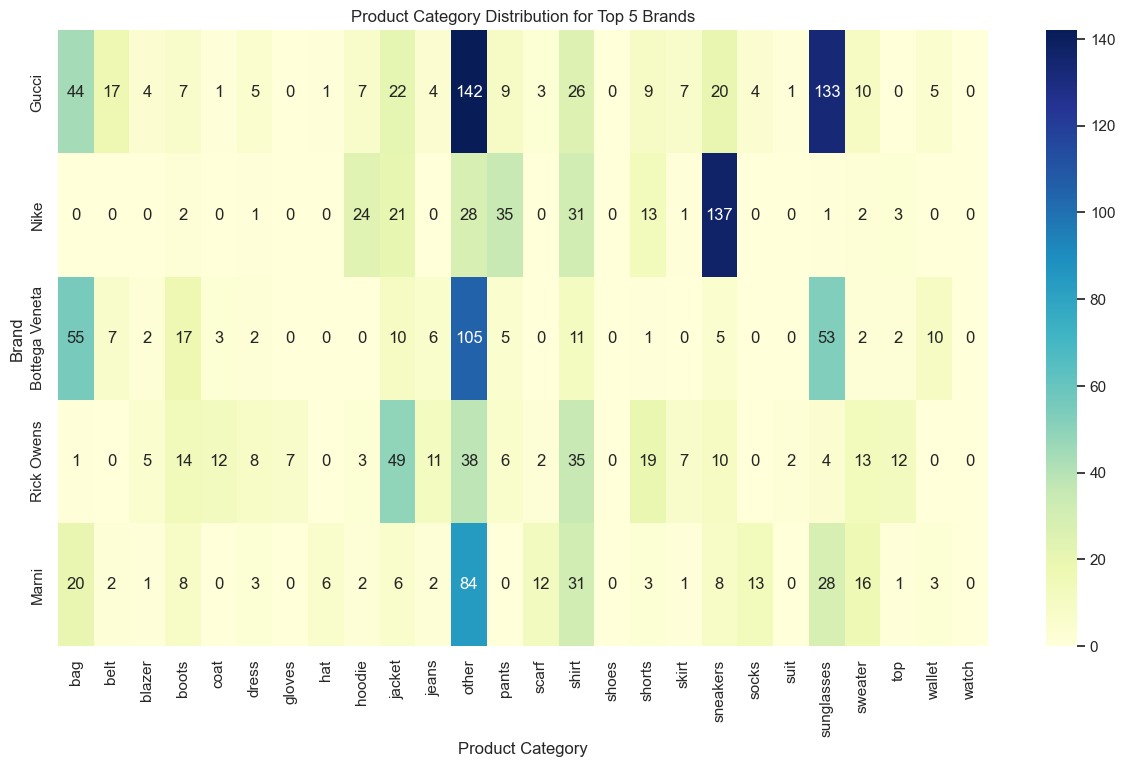

product_category,bag,belt,blazer,boots,coat,dress,gloves,hat,hoodie,jacket,...,shorts,skirt,sneakers,socks,suit,sunglasses,sweater,top,wallet,watch
Gucci,44.0,17.0,4.0,7.0,1.0,5.0,0.0,1.0,7.0,22.0,...,9.0,7.0,20.0,4.0,1.0,133.0,10.0,0.0,5.0,0.0
Nike,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,24.0,21.0,...,13.0,1.0,137.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0
Bottega Veneta,55.0,7.0,2.0,17.0,3.0,2.0,0.0,0.0,0.0,10.0,...,1.0,0.0,5.0,0.0,0.0,53.0,2.0,2.0,10.0,0.0
Rick Owens,1.0,0.0,5.0,14.0,12.0,8.0,7.0,0.0,3.0,49.0,...,19.0,7.0,10.0,0.0,2.0,4.0,13.0,12.0,0.0,0.0
Marni,20.0,2.0,1.0,8.0,0.0,3.0,0.0,6.0,2.0,6.0,...,3.0,1.0,8.0,13.0,0.0,28.0,16.0,1.0,3.0,0.0


In [35]:
# Further analysis: Exploring the relationship between brand and product category
# Grouping data by brand and product category
brand_category_distribution = ssense_data.groupby(['brand', 'product_category']).size().unstack().fillna(0)

# Plotting the distribution for the top 5 brands
top_5_brands = ssense_data['brand'].value_counts().head(5).index
brand_category_distribution_top_5 = brand_category_distribution.loc[top_5_brands]

plt.figure(figsize=(15, 8))
sns.heatmap(brand_category_distribution_top_5, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Product Category Distribution for Top 5 Brands')
plt.xlabel('Product Category')
plt.ylabel('Brand')
plt.show()

brand_category_distribution_top_5


**The heatmap illustrates the distribution of product categories for the top 5 brands in the SSENSE dataset:**

**Gucci:**

Dominant in categories like sunglasses (133 products), bags (44), and jackets (22).

Also has a presence in sneakers, shorts, and shirts.

**Nike:**

Strong focus on sneakers (137 products) and hoodies (24).

Also offers jackets and shorts.

**Bottega Veneta:**

Primarily known for bags (55 products) and sunglasses (53).

Also offers boots and wallets.

**Rick Owens:**

Notable for jackets (49 products) and coats (12).

Has a range in boots, hoodies, and tops.

**Marni:**

Focuses on sunglasses (28 products), sweaters (16), and bags (20).

Also provides hats, boots, and socks.

This analysis reveals the product specialization and diversity of these top brands. For example, Gucci and Bottega Veneta have a significant number of bags and sunglasses, while Nike is heavily focused on sneakers. Rick Owens and Marni show a more varied distribution across different categories.



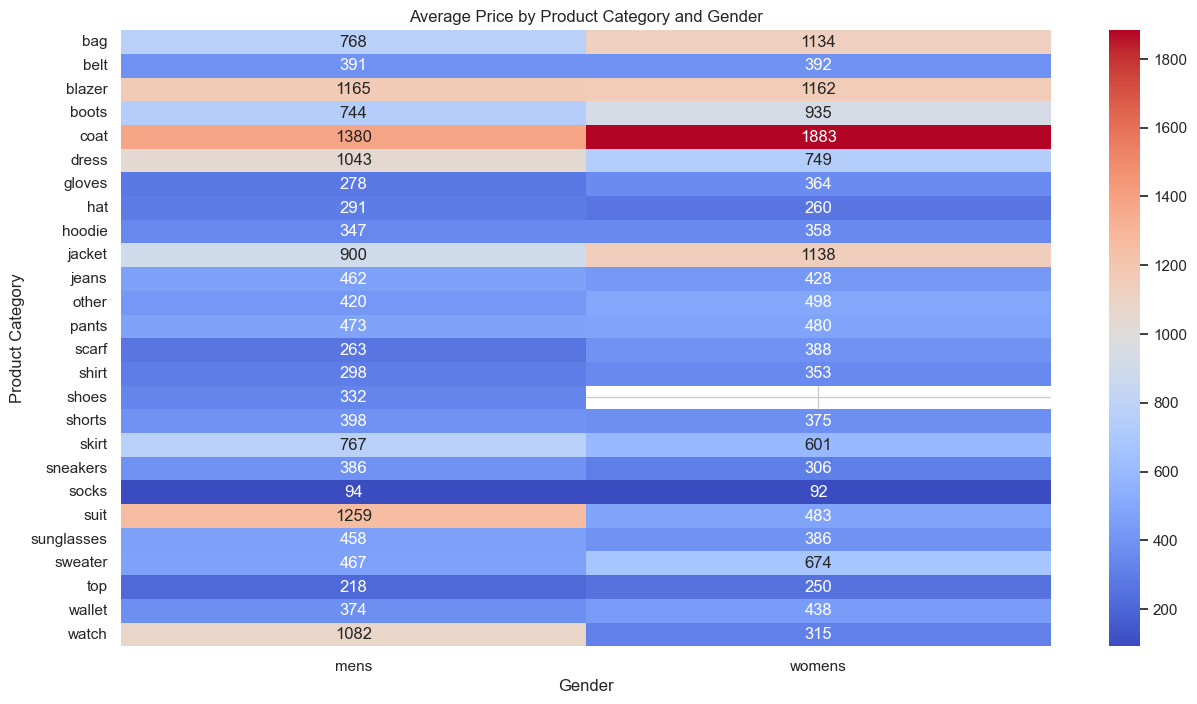

type,mens,womens
product_category,,
bag,768.374449,1133.752941
belt,390.643678,392.471698
blazer,1164.558824,1162.482143
boots,743.739130,935.243446
coat,1379.662835,1883.134387
dress,1042.571429,749.379374
gloves,278.000000,363.685714
hat,290.943396,260.447368
hoodie,347.178174,357.612069


In [36]:
# Further analysis: Investigating the correlation between price and gender
# Grouping data by product category and gender, then calculating the average price
average_price_by_category_gender = ssense_data.groupby(['product_category', 'type'])['price_usd'].mean().unstack()

# Plotting the average prices by product category and gender
plt.figure(figsize=(15, 8))
sns.heatmap(average_price_by_category_gender, annot=True, fmt=".0f", cmap="coolwarm")
plt.title('Average Price by Product Category and Gender')
plt.xlabel('Gender')
plt.ylabel('Product Category')
plt.show()

average_price_by_category_gender.head(10)

**The heatmap represents the average price of products by category and gender in the SSENSE dataset. Here are some observations:**

**Coats:** Women's coats have a significantly higher average price ($1883.13) compared to men's ($1379.66).

**Bags:** Women's bags are also priced higher on average ($1133.75) than men's ($768.37).

**Boots:** Women's boots ($935.24) are generally more expensive than men's ($743.74).

**Jackets:** Women's jackets have a higher average price ($1137.78) compared to men's ($900.23).

**Dresses:** Interestingly, men's dresses, which could include unisex or gender-neutral items, show a higher average price ($1042.57) than women's ($749.38).


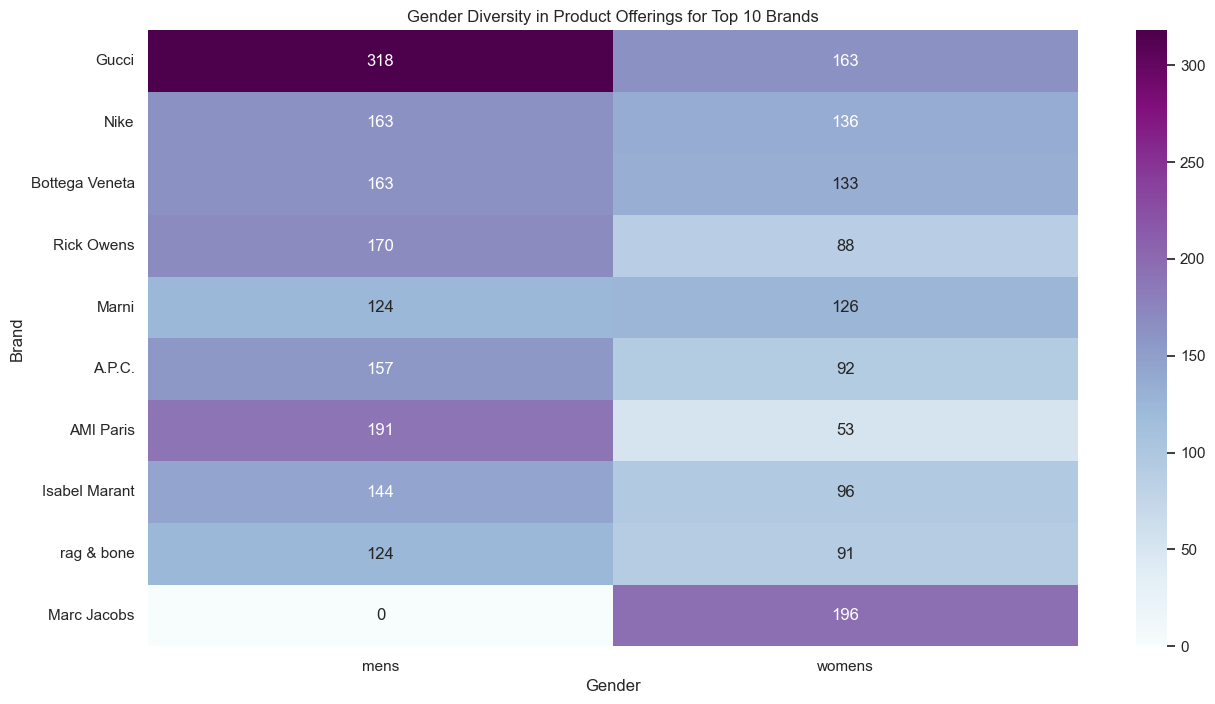

type,mens,womens
Gucci,318.0,163.0
Nike,163.0,136.0
Bottega Veneta,163.0,133.0
Rick Owens,170.0,88.0
Marni,124.0,126.0
A.P.C.,157.0,92.0
AMI Paris,191.0,53.0
Isabel Marant,144.0,96.0
rag & bone,124.0,91.0
Marc Jacobs,0.0,196.0


In [37]:
# Final analysis: Exploring brand diversity in terms of gender offerings
# Grouping data by brand and gender, then counting the number of products
brand_gender_diversity = ssense_data.groupby(['brand', 'type']).size().unstack().fillna(0)

# Plotting the diversity for the top 10 brands
top_10_brands = ssense_data['brand'].value_counts().head(10).index
brand_gender_diversity_top_10 = brand_gender_diversity.loc[top_10_brands]

plt.figure(figsize=(15, 8))
sns.heatmap(brand_gender_diversity_top_10, annot=True, fmt=".0f", cmap="BuPu")
plt.title('Gender Diversity in Product Offerings for Top 10 Brands')
plt.xlabel('Gender')
plt.ylabel('Brand')
plt.show()

brand_gender_diversity_top_10


**The heatmap showcases the gender diversity in product offerings for the top 10 brands in the SSENSE dataset:**

**Gucci:** Offers more products for men (318) compared to women (163).

**Nike:** A relatively balanced offering between men (163) and women (136).

**Bottega Veneta:** Similar to Nike, with a balance between men (163) and women (133).

**Rick Owens:** More products for men (170) than women (88).

**Marni:** Nearly balanced, with a slight leaning towards women's products (126 vs. 124).

**A.P.C.:** Heavily skewed towards men's products (157 vs. 92).

**AMI Paris:** Predominantly men's products (191 vs. 53).

**Isabel Marant:** More focused on men's products (144 vs. 96).

**rag & bone:** A balance between men's (124) and women's (91) products.

**Marc Jacobs:** Exclusively women's products in this dataset (196).

### **Price Analysis**

1 - **Average Price:** $559.41, with a wide range from $20 to $13,000, indicating a diverse range of products.

2 - **Price Distribution:** Concentrated in the lower range, suggesting a larger number of more affordably priced items in the luxury segment.

### **Brand Analysis**

**Top Brands:** Gucci, Nike, Bottega Veneta, Rick Owens, and Marni are among the most common brands.

**Brand Positioning:** Varies significantly, with Gucci and Bottega Veneta offering a considerable number of bags and sunglasses, Nike focusing on sneakers, and Rick Owens and Marni showing a diverse range of products.

### **Gender-Based Analysis**

1 - **Product Count:** More men's products (11,771) compared to women's (8,148).

2 - **Average Price Differences:** Certain categories like coats and bags are priced higher for women.

3 - **Brand Gender Diversity:** Varied approaches, with some brands like Gucci and Rick Owens focusing more on men's products, while others like Marc Jacobs focus exclusively on women's products.

### **Product Category Analysis**

1 - **Most Common Categories:** Shirts, jackets, and sneakers are among the most prevalent.

2 - **Price by Category:** Coats, blazers, and watches have the highest average prices, indicating their positioning as premium products.

## **Key Insights**

1 - **Market Segmentation:** There's a clear segmentation in the market, both in terms of gender and product categories. Brands have distinct strategies for targeting different customer segments.

2 - **Pricing Strategy:** Pricing varies greatly across categories and brands, reflecting different positioning strategies in the luxury market.

3 - **Brand Strategy:** Top brands have diverse strategies - some focusing on a wide range of products, while others specialize in specific categories.

4 - **Gender Targeting:** Most brands tend to have a larger number of men's products, though there are notable exceptions.



# [Hafida Belayd](https://www.linkedin.com/in/hafida-belayd/)
